In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import os

os.environ['SNORKELDB'] = 'postgres://localhost:5432/babble_test_spouse'

from snorkel import SnorkelSession
session = SnorkelSession()

In [2]:
from snorkel.models import candidate_subclass

Spouse = candidate_subclass('Spouse', ['person1', 'person2'])

In [3]:
candidates = session.query(Spouse).filter(Spouse.split == 1).all()
print(len(candidates))

2811


In [4]:
import os
import sys
sys.path.append(os.environ['SNORKELHOME'] + '/tutorials/babble/data/')
from mturk_processing import MTurkHelper

In [5]:
helper = MTurkHelper(candidates)

In [6]:
# input_csv_path= os.environ['SNORKELHOME'] + '/tutorials/babble/data/mturk_spouse_01_in.csv'
# helper.preprocess(input_csv_path)

Num HITs unique: 25
Num HITs total: 75


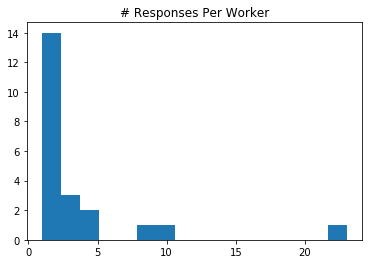

Median # seconds/HIT: 455 (113.0 s/explanation)


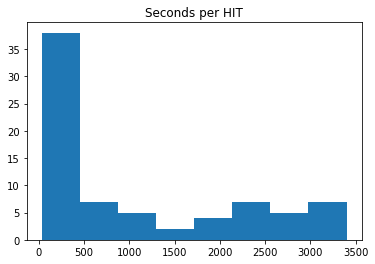

Unanimous: 61
Majority: 14
Split: 0
Bad: 25


In [7]:
output_csv_path= os.environ['SNORKELHOME'] + '/tutorials/babble/data/mturk_spouse_01_out.csv'
explanations = helper.postprocess(output_csv_path, verbose=True)

In [11]:
from snorkel.viewer import SentenceNgramViewer
for exp in explanations:
    print(exp.condition)
#     print('({}, {}): Label {} because {}'.format(
#         exp.candidate[0].get_span().encode('utf-8'), exp.candidate[1].get_span().encode('utf-8'), exp.label, exp.condition))

No indication of marriage between these two entities.
person1 merely sent a letter to person2.
the given text does not indicate that person1 and person2 are/were married.
person2 is named as person1's wife.
The people highlighted here are married to each other.
the text says "his wife"
nothing in the text indicates that these people are married
No indication of marriage here.
No indication of marriage.
person1 and person2 are acts performing at an event.
Person1 has no second word.
No indication of marriage between these two entities.
No indication of marriage.
They are not married
No indication of marriage between these two entities.
No indication of marriage between these two entities.
No indication of marriage.
the word "daughter" occurs within three words to the left of person2.
not clear if they are married
nothing in the text indicates that these people are married
is says  that these two are married.
The text states that they are a "married couple"
Finally a correctly highlighte

In [10]:
sv = SentenceNgramViewer([exp.candidate for exp in explanations], session, n_per_page=3, height=300)
sv

<IPython.core.display.Javascript object>